# NETFLIX NLP - DATA MODELING






## Import Libraries

In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import datetime

%matplotlib inline


/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Load the aggregate information data
df = pd.read_csv('netflix_titles.csv')

In [3]:
#Number of rows and columns
num_rows, num_columns = df.shape
print('#columns: ', num_columns)
print('#rows: ', num_rows)


#columns:  12
#rows:  7787


In [4]:
#First few rows of the data
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


In [5]:
df1 = pd.read_csv('title_ratings.csv')
df1.head()

,tconst,averageRating,numVotes
0,tt0000001,5.7,1775
1,tt0000002,6.0,227
2,tt0000003,6.5,1532
3,tt0000004,6.1,147
4,tt0000005,6.2,2351


In [6]:
df2 = pd.read_csv('title_names.csv')
df2.head()

/Users/tddagdas/opt/anaconda3/envs/Main/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (5) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance"
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short"
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short"


In [7]:
df3 = df2.merge(df1, on='tconst', how='left')#.query('num_events==num_events')
df3.head()

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,numVotes
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,1775.0
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,227.0
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,1532.0
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,147.0
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,2351.0


In [8]:
df3.rename(columns={'primaryTitle': 'title'}, inplace=True)

In [9]:
df4 = df3.merge(df, on='title', how='left')#.query('num_events==num_events')
df4.head()

,tconst,titleType,title,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres,averageRating,...,type,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short",5.7,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short",6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,4,"Animation,Comedy,Romance",6.5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,tt0000004,short,Un bon bock,Un bon bock,0,1892,\N,12,"Animation,Short",6.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,tt0000005,short,Blacksmith Scene,Blacksmith Scene,0,1893,\N,1,"Comedy,Short",6.2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
df4.columns

Index(['tconst', 'titleType', 'title', 'originalTitle', 'isAdult', 'startYear',
       'endYear', 'runtimeMinutes', 'genres', 'averageRating', 'numVotes',
       'show_id', 'type', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [11]:
df4.drop(columns=['titleType', 'originalTitle', 'isAdult', 'startYear', 'endYear', 'runtimeMinutes', 'genres','numVotes',
       'show_id', 'type', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration'], inplace = True)

In [12]:
df4.head()

,tconst,title,averageRating,listed_in,description
0,tt0000001,Carmencita,5.7,NaN,NaN
1,tt0000002,Le clown et ses chiens,6.0,NaN,NaN
2,tt0000003,Pauvre Pierrot,6.5,NaN,NaN
3,tt0000004,Un bon bock,6.1,NaN,NaN
4,tt0000005,Blacksmith Scene,6.2,NaN,NaN


In [13]:
df4.shape

(999999, 5)

In [14]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 999999 entries, 0 to 999998
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   tconst         999999 non-null  object 
 1   title          999999 non-null  object 
 2   averageRating  445935 non-null  float64
 3   listed_in      11120 non-null   object 
 4   description    11120 non-null   object 
dtypes: float64(1), object(4)
memory usage: 45.8+ MB


In [15]:
df4.duplicated().sum() 

0

In [16]:
df4.isna().sum()

tconst                0
title                 0
averageRating    554064
listed_in        988879
description      988879
dtype: int64

In [17]:
df4.dropna(subset=["averageRating", "listed_in", 'description'], inplace=True)

In [18]:
df4.isna().sum()

tconst           0
title            0
averageRating    0
listed_in        0
description      0
dtype: int64

In [19]:
df4.shape

(7522, 5)

In [20]:
#df4.reset_index(inplace=True)

In [21]:
df4.head(5)

,tconst,title,averageRating,listed_in,description
435,tt0000439,The Great Train Robbery,7.3,"British TV Shows, Crime TV Shows, Internationa...",This two-part tale delivers the true story of ...
483,tt0000487,The Great Train Robbery,7.0,"British TV Shows, Crime TV Shows, Internationa...",This two-part tale delivers the true story of ...
748,tt0000758,Sherlock Holmes,6.2,"Action & Adventure, Comedies",The game is afoot for an eccentric detective w...
958,tt0000969,Les Misérables,6.4,"Dramas, International Movies, Music & Musicals",The musical version of Victor Hugo's epic tale...
1132,tt0001144,The Call,4.8,"International Movies, Thrillers",Connected by phone in the same home but 20 yea...


In [22]:
df4.drop(columns=['tconst', 'listed_in'], inplace = True)
                        
                     

In [23]:
df4 = df4.reset_index(drop=True)
df4.head()

,title,averageRating,description
0,The Great Train Robbery,7.3,This two-part tale delivers the true story of ...
1,The Great Train Robbery,7.0,This two-part tale delivers the true story of ...
2,Sherlock Holmes,6.2,The game is afoot for an eccentric detective w...
3,Les Misérables,6.4,The musical version of Victor Hugo's epic tale...
4,The Call,4.8,Connected by phone in the same home but 20 yea...


In [24]:
import nltk
#nltk.download()
import re

import pickle
nltk.download('stopwords')

from nltk.corpus import stopwords

from nltk.stem.porter import PorterStemmer

ps= PorterStemmer()

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/tddagdas/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [25]:
df4.head()

,title,averageRating,description
0,The Great Train Robbery,7.3,This two-part tale delivers the true story of ...
1,The Great Train Robbery,7.0,This two-part tale delivers the true story of ...
2,Sherlock Holmes,6.2,The game is afoot for an eccentric detective w...
3,Les Misérables,6.4,The musical version of Victor Hugo's epic tale...
4,The Call,4.8,Connected by phone in the same home but 20 yea...


In [26]:
#df4.rename(columns={'description': 'text'}, inplace=True)

In [27]:
# Apply a first round of text cleaning techniques
import re
import string

def clean_text_round1(text):
    '''Make text lowercase, remove text in square brackets, remove punctuation and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

round1 = lambda x: clean_text_round1(x)

In [28]:
# Let's take a look at the updated text
data_clean = pd.DataFrame(df4.description.apply(round1))
data_clean

,description
0,this twopart tale delivers the true story of t...
1,this twopart tale delivers the true story of t...
2,the game is afoot for an eccentric detective w...
3,the musical version of victor hugos epic tale ...
4,connected by phone in the same home but years...
...,...
7517,with humor and empathy brené brown discusses w...
7518,there is no such thing as an ordinary interact...
7519,embark on a global cultural journey into stree...
7520,forging his own comedic boundaries anthony jes...


In [29]:
# Apply a second round of cleaning

def clean_text_round2(text):
    '''Get rid of some additional punctuation and non-sensical text that was missed the first time around.'''
    text = text.lower()
    text = re.sub('[‘’“”…]', '', text)
    text = re.sub('\n', '', text)
    text = re.sub('[^a-zA-Z]', ' ', text)
    return text

round2 = lambda x: clean_text_round2(x)

In [30]:
# Let's take a look at the second round
data_clean = pd.DataFrame(df4.description.apply(round2))
data_clean

,description
0,this two part tale delivers the true story of ...
1,this two part tale delivers the true story of ...
2,the game is afoot for an eccentric detective w...
3,the musical version of victor hugo s epic tale...
4,connected by phone in the same home but yea...
...,...
7517,with humor and empathy bren brown discusses ...
7518,there is no such thing as an ordinary interact...
7519,embark on a global cultural journey into stree...
7520,forging his own comedic boundaries anthony je...


In [32]:
# We are going to create a document-term matrix using CountVectorizer, and exclude common English stop words

from sklearn.feature_extraction.text import CountVectorizer

cv = CountVectorizer(stop_words='english', max_features = 2000) #there were over 8000 features
data_cv = cv.fit_transform(data_clean.description)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = data_clean.index
data_dtm

,abagnale,abandoned,abandoning,abducted,abilities,ability,abnormal,aboard,abound,abroad,...,wwi,xue,year,years,york,yoruba,young,youssef,yusuf,zack
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [33]:
df4['averageRating'].dtype

#int(num1)

dtype('float64')

In [34]:
df4['averageRating'] = df4['averageRating'].astype(int)

df4['averageRating'].dtype

dtype('int64')

In [35]:
df4['averageRating'].value_counts()

7     2561
6     2019
8     1317
5      936
4      374
3      139
9      128
2       42
1        3
10       3
Name: averageRating, dtype: int64

In [36]:
X= data_dtm
y= df4['averageRating']

In [37]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

In [38]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)

y_pred = gnb.predict(X_test)

In [39]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)
print('GNB')
print(cm)

GNB
[[  0   0   0   0   1   0   0   0   0   0]
 [  0   1   0   3   4   0   0   2   1   0]
 [  0   2   5   7  15   3   1   9   3   0]
 [  0   5  10  24  48   7   5  21  12   0]
 [  0   4  27  66 103  17   8  65  25   0]
 [  1  17  62 110 239  57  22 127  43   2]
 [  1  26  67 139 255  37  13 184  86   1]
 [  2  13  37  88 150  17  13  77  44   1]
 [  0   4   6  13  14   3   1   4   2   0]
 [  0   0   0   0   0   0   0   1   0   0]]


In [ ]:
# first import pycaret package and use its confusion matrix

#plot_model(tuned_rf, plot = 'confusion_matrix')

In [40]:
import ppscore as pps
import pycaret
from matplotlib.pyplot import figure
import numpy as np



In [41]:
X= data_dtm
y= df4['averageRating']

In [42]:
# combine x and y in a dataframe df1
df1 = pd.DataFrame(data_dtm)
df1['y'] = y
df1

,abagnale,abandoned,abandoning,abducted,abilities,ability,abnormal,aboard,abound,abroad,...,xue,year,years,york,yoruba,young,youssef,yusuf,zack,y
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,6
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7517,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
7518,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,7
7519,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,8
7520,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,7


In [43]:
# compare machine learning algorithms on the epileptic seizure dataset
#from pandas import read_csv
from pycaret.classification import setup
from pycaret.classification import compare_models

# define the location of the dataset
#file='data.csv'
# load the dataset
#df = pd.read_csv(file)

# setup the dataset
grid = setup(data=df1, target=df1.columns[-1], html=False, silent=True, verbose=False)
# evaluate models and compare models
best = compare_models()
# report the best model
print(best)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.23


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
nb,Naive Bayes,0.1259,0.0513,0.1220,0.2656,0.1213,0.0115,0.0130,0.320


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
nb,Naive Bayes,0.1259,0.0513,0.1220,0.2656,0.1213,0.0115,0.0130,0.320


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
svm,SVM - Linear Kernel,0.2061,0.0000,0.1075,0.1734,0.1237,-0.0007,-0.0025,2.299
nb,Naive Bayes,0.1259,0.0513,0.1220,0.2656,0.1213,0.0115,0.0130,0.320


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
svm,SVM - Linear Kernel,0.2061,0.0000,0.1075,0.1734,0.1237,-0.0007,-0.0025,2.299
nb,Naive Bayes,0.1259,0.0513,0.1220,0.2656,0.1213,0.0115,0.0130,0.320


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
rf,Random Forest Classifier,0.2885,0.0492,0.1239,0.2513,0.2618,0.0167,0.0170,4.048
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
svm,SVM - Linear Kernel,0.2061,0.0000,0.1075,0.1734,0.1237,-0.0007,-0.0025,2.299
nb,Naive Bayes,0.1259,0.0513,0.1220,0.2656,0.1213,0.0115,0.0130,0.320


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
rf,Random Forest Classifier,0.2885,0.0492,0.1239,0.2513,0.2618,0.0167,0.0170,4.048
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
svm,SVM - Linear Kernel,0.2061,0.0000,0.1075,0.1734,0.1237,-0.0007,-0.0025,2.299
nb,Naive Bayes,0.1259,0.0513,0.1220,0.2656,0.1213,0.0115,0.0130,0.320
qda,Quadratic Discriminant Analysis,0.0000,0.0500,0.0000,0.0000,0.0000,-0.0001,-0.0009,0.421


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3411,0.0501,0.1198,0.2067,0.1791,0.0012,0.0087,0.718
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
rf,Random Forest Classifier,0.2885,0.0492,0.1239,0.2513,0.2618,0.0167,0.0170,4.048
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
svm,SVM - Linear Kernel,0.2061,0.0000,0.1075,0.1734,0.1237,-0.0007,-0.0025,2.299
nb,Naive Bayes,0.1259,0.0513,0.1220,0.2656,0.1213,0.0115,0.0130,0.320
qda,Quadratic Discriminant Analysis,0.0000,0.0500,0.0000,0.0000,0.0000,-0.0001,-0.0009,0.421


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3411,0.0501,0.1198,0.2067,0.1791,0.0012,0.0087,0.718
gbc,Gradient Boosting Classifier,0.3295,0.0486,0.1244,0.2729,0.2496,0.0224,0.0284,22.710
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
rf,Random Forest Classifier,0.2885,0.0492,0.1239,0.2513,0.2618,0.0167,0.0170,4.048
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
svm,SVM - Linear Kernel,0.2061,0.0000,0.1075,0.1734,0.1237,-0.0007,-0.0025,2.299
nb,Naive Bayes,0.1259,0.0513,0.1220,0.2656,0.1213,0.0115,0.0130,0.320
qda,Quadratic Discriminant Analysis,0.0000,0.0500,0.0000,0.0000,0.0000,-0.0001,-0.0009,0.421


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3411,0.0501,0.1198,0.2067,0.1791,0.0012,0.0087,0.718
gbc,Gradient Boosting Classifier,0.3295,0.0486,0.1244,0.2729,0.2496,0.0224,0.0284,22.710
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
rf,Random Forest Classifier,0.2885,0.0492,0.1239,0.2513,0.2618,0.0167,0.0170,4.048
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
lda,Linear Discriminant Analysis,0.2479,0.0500,0.1135,0.2701,0.2561,0.0343,0.0345,3.316
svm,SVM - Linear Kernel,0.2061,0.0000,0.1075,0.1734,0.1237,-0.0007,-0.0025,2.299
nb,Naive Bayes,0.1259,0.0513,0.1220,0.2656,0.1213,0.0115,0.0130,0.320


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3411,0.0501,0.1198,0.2067,0.1791,0.0012,0.0087,0.718
gbc,Gradient Boosting Classifier,0.3295,0.0486,0.1244,0.2729,0.2496,0.0224,0.0284,22.710
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
rf,Random Forest Classifier,0.2885,0.0492,0.1239,0.2513,0.2618,0.0167,0.0170,4.048
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
et,Extra Trees Classifier,0.2809,0.0496,0.1304,0.2619,0.2653,0.0271,0.0274,5.125
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
lda,Linear Discriminant Analysis,0.2479,0.0500,0.1135,0.2701,0.2561,0.0343,0.0345,3.316
svm,SVM - Linear Kernel,0.2061,0.0000,0.1075,0.1734,0.1237,-0.0007,-0.0025,2.299


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3411,0.0501,0.1198,0.2067,0.1791,0.0012,0.0087,0.718
gbc,Gradient Boosting Classifier,0.3295,0.0486,0.1244,0.2729,0.2496,0.0224,0.0284,22.710
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
rf,Random Forest Classifier,0.2885,0.0492,0.1239,0.2513,0.2618,0.0167,0.0170,4.048
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
et,Extra Trees Classifier,0.2809,0.0496,0.1304,0.2619,0.2653,0.0271,0.0274,5.125
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
lda,Linear Discriminant Analysis,0.2479,0.0500,0.1135,0.2701,0.2561,0.0343,0.0345,3.316
svm,SVM - Linear Kernel,0.2061,0.0000,0.1075,0.1734,0.1237,-0.0007,-0.0025,2.299


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3411,0.0501,0.1198,0.2067,0.1791,0.0012,0.0087,0.718
gbc,Gradient Boosting Classifier,0.3295,0.0486,0.1244,0.2729,0.2496,0.0224,0.0284,22.710
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
rf,Random Forest Classifier,0.2885,0.0492,0.1239,0.2513,0.2618,0.0167,0.0170,4.048
lightgbm,Light Gradient Boosting Machine,0.2879,0.0484,0.1156,0.2438,0.2554,0.0087,0.0089,0.763
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
et,Extra Trees Classifier,0.2809,0.0496,0.1304,0.2619,0.2653,0.0271,0.0274,5.125
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038
lda,Linear Discriminant Analysis,0.2479,0.0500,0.1135,0.2701,0.2561,0.0343,0.0345,3.316


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3411,0.0501,0.1198,0.2067,0.1791,0.0012,0.0087,0.718
gbc,Gradient Boosting Classifier,0.3295,0.0486,0.1244,0.2729,0.2496,0.0224,0.0284,22.710
catboost,CatBoost Classifier,0.3168,0.0496,0.1248,0.2477,0.2548,0.0119,0.0132,123.753
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
rf,Random Forest Classifier,0.2885,0.0492,0.1239,0.2513,0.2618,0.0167,0.0170,4.048
lightgbm,Light Gradient Boosting Machine,0.2879,0.0484,0.1156,0.2438,0.2554,0.0087,0.0089,0.763
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
et,Extra Trees Classifier,0.2809,0.0496,0.1304,0.2619,0.2653,0.0271,0.0274,5.125
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.3411,0.0501,0.1198,0.2067,0.1791,0.0012,0.0087,0.718
gbc,Gradient Boosting Classifier,0.3295,0.0486,0.1244,0.2729,0.2496,0.0224,0.0284,22.710
catboost,CatBoost Classifier,0.3168,0.0496,0.1248,0.2477,0.2548,0.0119,0.0132,123.753
lr,Logistic Regression,0.2891,0.0486,0.1273,0.2511,0.2632,0.0155,0.0158,11.230
rf,Random Forest Classifier,0.2885,0.0492,0.1239,0.2513,0.2618,0.0167,0.0170,4.048
lightgbm,Light Gradient Boosting Machine,0.2879,0.0484,0.1156,0.2438,0.2554,0.0087,0.0089,0.763
knn,K Neighbors Classifier,0.2826,0.0480,0.1254,0.2539,0.2566,0.0192,0.0199,3.009
ridge,Ridge Classifier,0.2815,0.0000,0.1273,0.2511,0.2619,0.0154,0.0155,0.184
et,Extra Trees Classifier,0.2809,0.0496,0.1304,0.2619,0.2653,0.0271,0.0274,5.125
dt,Decision Tree Classifier,0.2773,0.0496,0.1329,0.2625,0.2653,0.0308,0.0311,1.038


AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=6239)


In [44]:
# tune model hyperparameters on the netflix dataset

#from pandas import read_csv
from sklearn.ensemble import AdaBoostClassifier 
#from pycaret.classification import setup
from pycaret.classification import tune_model

# define the location of the dataset
#file='data.csv'
# load the dataset
#df = pd.read_csv(file)

# setup the dataset
grid = setup(data=df1, target=df1.columns[-1], html=False, silent=True, verbose=False)
# tune model hyperparameters
best = tune_model(AdaBoostClassifier(), n_iter=200, choose_better=True) #k value cross validation to identify
                                                                           #number of split
# report the best model
print(best)

Fitting 10 folds for each of 200 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:  6.0min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed: 12.7min
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed: 53.1min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed: 558.6min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed: 694.2min finished


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3359,0.0,0.1252,0.1818,0.1726,0.0007,0.0043
1,0.3359,0.0,0.1112,0.1530,0.1732,0.0012,0.0057
2,0.3435,0.0,0.1148,0.3992,0.1886,0.0136,0.0512
3,0.3378,0.0,0.1128,0.2285,0.1938,0.0066,0.0186
4,0.3264,0.0,0.1087,0.1655,0.1685,-0.0083,-0.0326
5,0.3422,0.0,0.1289,0.2613,0.1925,0.0136,0.0472
6,0.3251,0.0,0.1216,0.1378,0.1680,-0.0126,-0.0497
7,0.3384,0.0,0.1271,0.2126,0.1826,0.0076,0.0287
8,0.3327,0.0,0.1246,0.1802,0.1740,-0.0015,-0.0065
9,0.3403,0.0,0.1279,0.2273,0.1863,0.0106,0.0384


AdaBoostClassifier(algorithm='SAMME', base_estimator=None, learning_rate=0.308,
                   n_estimators=90, random_state=None)


In [46]:
from pycaret.classification import *

In [50]:
ada = create_model('ada')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.3340,0.0,0.1105,0.1132,0.1691,0.0003,0.0015
1,0.3340,0.0,0.1105,0.1135,0.1694,-0.0007,-0.0034
2,0.3397,0.0,0.1137,0.2988,0.1807,0.0078,0.0365
3,0.3378,0.0,0.1122,0.2508,0.1798,0.0051,0.0225
4,0.3321,0.0,0.1105,0.1111,0.1665,-0.0024,-0.0296
5,0.3346,0.0,0.1111,0.1124,0.1683,0.0016,0.0136
6,0.3289,0.0,0.1229,0.1107,0.1656,-0.0081,-0.0577
7,0.3365,0.0,0.1259,0.2039,0.1722,0.0034,0.0242
8,0.3346,0.0,0.1250,0.1120,0.1678,0.0000,0.0000
9,0.3384,0.0,0.1271,0.2343,0.1823,0.0073,0.0302


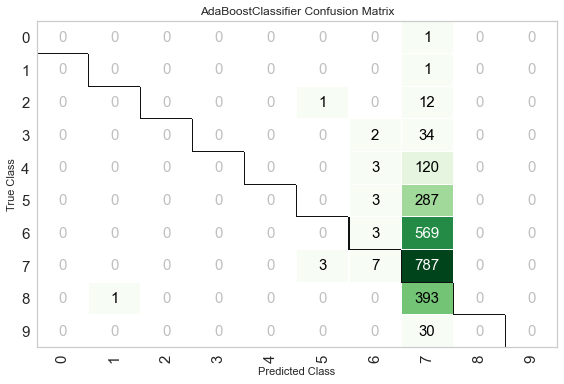

In [51]:
plot_model(ada, plot = 'confusion_matrix')